# Two Disks in a Rectangular Box: mean first event times. 3D version.

Here are the simulations and calculations, numerical vs. analytical, of the mean first times and their distributions, for a series of interesting events, namely, hopping, crashing and wall-hitting.

The external file contains all the routines for initial conditions and dynamic rules.



In [1]:
include("discs_in_box3D.jl")

0


dynamics

In [2]:
a=1
a*5/2

2.5

In [3]:
#auxiliary libs for ploting
using Plots, Interact
gr(fmt="png", size=(640,480))

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-18311210075892817191\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12431411679130668537\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-18311210075892817191\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

In [4]:
# A small test. w is widht, h height, r is radius for both discs.
h1, h2, h3 = 1, 1.5, 1.75
r = 0.2
#= dynamics returns a tuple of results, in which we have the timestamp of an event, the position of the center
oof the discs, the velocites of each disc and the collition type according to following code:
+1/-1 -> disc one hits first axis  wall
+2/-2 -> disc one hits second axis wall
+3/-3  -> disc one hits third axis wall
+4/-4 -> disc two hits first axis wall.
+5/-5 -> disc two hits second axis wall.
+6/-6 -> disc two hits third axis wall.
7 -> discs collide.
=#
@time times, positions, velocities, collision_types = dynamics(h1,h2,h3, r, 30000);

0
  0.743458 seconds (1.59 M allocations: 102.275 MiB, 4.21% gc time)


In [5]:
println(norm.(velocities)[1:100]) #Sanity Check

[0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999,

In [6]:
println(collision_types[1:100])#Sanity Check

[1, -3, -1, 6, -4, 1, 7, -4, 2, -3, 4, 6, -5, -4, 7, 6, 4, -3, 7, -1, -5, -3, 1, 4, -1, 6, 7, 4, 6, 7, -1, -4, 1, -3, -1, 5, 4, 7, 5, 4, 6, -2, -1, -4, -5, 2, 4, -6, 7, 1, -5, -4, 2, 4, -1, 5, 3, -4, -2, 4, 1, -5, 7, -4, -6, 2, 4, 7, -1, 7, 4, 2, -4, -5, 1, 4, 7, -1, -4, -6, 3, 1, 2, 4, -1, 7, 2, -5, -1, 4, -3, -2, 5, -4, -5, 2, 5, 1, 4, -2]


In [7]:
#println(positions[1:100])

The function `dynamics` returns data on the collisions that have occurred.

# Hopping

The data from the simulation directly gives disc and wall collision times.
The other times that we require are hopping times, both horizontal, when $x_1 = x_2$, and vertical, when $y_1 = y_2$. 

Vertical hops can be detected from the data when $y_2 - y_1$ changes sign between two consecutive collisions.
Using the relative velocity $v_2 - v_1$, the vertical hopping time when $y_2 - y_1 = 0$ can be recovered.

In [8]:
"""
Calculate the times at which  hops occur in 3D (First Axis per default)
"""
function hopping_times(times, positions, velocities; dimax=1)
    # dimax specifies which axis, 1 ("x"), 2 ("y"), 3, ("z")
    Δxs = [x[dimax+3] - x[dimax] for x in positions]  # x_2 - x_1
    Δus = [v[dimax+3] - v[dimax] for v in velocities]  # u_2 - u_1;
    
    # indices where there is a hop between collisions i and i+1: 
    hop_indices = findall(i->sign(Δxs[i]) != sign(Δxs[i+1]),1:(length(positions)-1) );  
    
    # x + t*u = 0   so   t = -x/u
    hopping_times = times[hop_indices.+1] - (Δxs[hop_indices] ./ Δus[hop_indices])
    
    return hopping_times
end
## Verified by karel, it is correct.
 


hopping_times

 ## Analytical Expressions
 
 ### 1. Volume
 
 In this generalization, Volume has four regimes, acording to which hopping gets excluded as  radius of the balls grows. We will only deal this time with the case in which all hopping is possible. 
 
 In the below functions, "Neg" indicates excluded Volume

 Superficie esfera S(d-1) = 2 pi^(d /2) / gamma(d/2)
 
 Volumen en esfera B(d-1) = S(d-2)/(d-1) = 2 * pi^((d-1)/2)/(gamma((d-1)/2)*(d-1))

En este caso, S(5)/B(5)= pi^3 * 5 * gama(5/2)/(pi^(5/2)*gamma(3))

In [9]:

cte=π * 15/8  #E=1/2, -> abs(v^2)=1 as above

 #= maximal possible radius for balls to hope in the first axis direction!
It is the maximal size of discs possible for a lesser dimensional table with the other axis as parameters!!
=#

#given that we do not have formulas for the disjoint ergodic componets,
# we preclude all hoping
rhopmax(x1,x2)=(x1+x2-sqrt(2*x1*x2))/2
rhopmax1=rhopmax(h2,h3)
rhopmax2=rhopmax(h3,h1)
rhopmax3=rhopmax(h1,h2)

#chicharronera for maximal radius
ach=4*(3-1)
bch=-4*(h1+h2+h3)
cch=h1^2+h2^2+h3^2
rmax=(-bch-sqrt(bch^2-4*ach*cch))/(2*ach)
#rfin=minimum([rmax, rhopmax1, rhopmax2, rhopmax3])
# volume formula is discontinuous at minimum(h1,h2,h3)/4 !!!
rfin=0.25

sr2= sqrt(2)

volBox(a1, a2, a3) = 64 *a1^2*a2^2*a3^2
volNegfree(a1, a2, a3, r) = 64* ( (sr2*r)^3*π/6*a1*a2*a3*sr2^3
                                -(sr2*r)^4/16*π*(a1*a2+a2*a3+a3*a1)*sr2^2
                                +(sr2*r)^5/15*(a1+a2+a3)*sr2
                                -(sr2*r)^6/48)


function vol(a, b, c, r)
    result = volBox(a, b, c) - volNegfree(a, b, c, r)
    return result
end 



vol (generic function with 1 method)

In [10]:
rhopmax1, rhopmax2, rhopmax3, rmax

(0.47935607626104004, 0.43958565330651467, 0.3839745962155614, 0.479538809181949)

## 2 Areas

#### Hopping Areas

In [11]:
""" Explore hops along the first (a or h1) dimension """ 

function area_horiz_hop3D(a, b, c, r)
    vnegbc=16*pi*b*c*r^2-64/3*(b+c)*r^3+8*r^4
    vposbc=16*b^2*c^2
    result= 2 *sr2* a * (vposbc-vnegbc)

    return result
end


area_horiz_hop3D (generic function with 1 method)

### collision with wall
When hopping is no longer possible, the volume is split into disjoint components. This is equivalent to a factor
in the area of 2 or 4. Given that this only is relevant in this case, we take put those factors here. In the case of collition between discs, that factor is canceled as both the Volume and Area get split equally.

In [12]:
" It hits the h3 or c wall (the third wall)"
function area_wall3D(a, b, c, r)
    
    partepositiva= 32 * c * a^2 * b^2
    partenegativa= (64 * pi * (a * b ) * r^3/3 
                    - 8 * pi * ( a + b) * r^4 
                    + 128/15 * r ^5)
  
    
    result = partepositiva - partenegativa 
     # probemos negativa sola primero
    #result = partenegativa
    
    return result
end

area_wall3D

###  Collition between discs:
Although here the space get also split,the factor accounting for that does not appear as it cancels itself in Area and Volume.

In [13]:
""" Analytical Area for Collitions 3D """

function area_col3D(a,b,c,r)
    # asumiendo r<rhopmax
    result= 64 * sr2 * (2 * π * r^2 * a * b *c 
                - r^3 * π * (a*b+b*c+c*a)
                + 4 * r ^4 / 3* (a+b+c)
                -r^5/2)
end

area_col3D (generic function with 1 method)

### 3. Mean Times Machta Zwanzig

We combine area and volume with the general factor to obtain the theoretical mean times according to Machta Zwanzig Formula

In [14]:
horiz_hop_analytical(a,b, c, r)=cte*vol(a,b,c, r)/area_horiz_hop3D(a,b,c,r)
upper_wall_analytical(a,b,c,r)=cte*vol(a,b,c,r)/area_wall3D(a,b,c,r) #perfect
disc_collision_analytical(a,b,c,r)=cte*vol(a,b,c,r)/area_col3D(a,b,c,r)

disc_collision_analytical (generic function with 1 method)

The simulation function gives us a quick sanity check on the four event formulas above, but it doesn't give statistics. We relegate that to some other functions below.

In [15]:
function simulation(h1, h2, h3, num_collisions=10^3, rango=0.005:0.005:rfin)
    
    num_horiz_hop_data=Float64[]
    exact_horiz_hop_data=Float64[]
        
    num_disc_collision_data = Float64[]
    exact_disc_collision_data = Float64[]
    
    num_upwall_data = Float64[]
    exact_upwall_data = Float64[]
    

    
    for r in rango
        print(r, " ")
        flush(stdout)
        
        a = h1/2 - r
        b = h2/2 - r
        c = h3/2 -r
        
        
        times, positions, velocities, collision_types = dynamics(h1, h2, h3, r, num_collisions);
        
        
        horiz_hopping_times = hopping_times(times, positions, velocities, dimax=1)

        push!(num_horiz_hop_data, mean(diff(horiz_hopping_times)))   # diff gives inter-hop times
        push!(exact_horiz_hop_data, horiz_hop_analytical(a, b, c,  r))
        
        disc_collision_times = times[collision_types .== 7]
        push!(num_disc_collision_data, mean(diff(disc_collision_times)))   # diff gives inter-hop times
        push!(exact_disc_collision_data, disc_collision_analytical(a, b, c, r))
       
        upwall_times = times[collision_types .== -6]
        push!(num_upwall_data, mean(diff(upwall_times)))   # diff gives inter-hop times
        push!(exact_upwall_data, upper_wall_analytical(a, b,c, r))
        
    end
    
    return (num_horiz_hop_data, exact_horiz_hop_data, num_disc_collision_data, 
        exact_disc_collision_data, num_upwall_data, exact_upwall_data)
                
end

simulation (generic function with 3 methods)

# A general Test

This first simulation produces a general sanity test. More accurate simulations for the specific events are below . The Figures here are NOT the ones in the paper, this are averages done with lower samples meant as a sanity check.

In [16]:
nevents=5*10^5
rango=0.01:0.01:0.25
@time (num_horiz_hop_data, exact_horiz_hop_data, num_disc_collision_data, 
    exact_disc_collision_data, num_upwall_data, exact_upwalldata)= simulation(h1, h2, h3, nevents, rango);

0.01 0
0.02 0
0.03 0
0.04 0
0.05 0
0.06 0
0.07 0
0.08 0
0.09 0
0.1 0
0.11 0
0.12 0
0.13 0
0.14 0
0.15 0
0.16 0
0.17 0
0.18 0
0.19 0
0.2 0
0.21 0
0.22 0
0.23 0
0.24 0
0.25 0
 22.228438 seconds (145.02 M allocations: 16.573 GiB, 45.57% gc time)


In [17]:
using JLD # To save the data, and save us headeaches

In [18]:
save("DatosNumericos3D_10a5.jld", "rango", rango, 
    "num_horiz_hop_data", num_horiz_hop_data,
    "num_disc_collision_data", num_disc_collision_data,
    "num_upwall_data", num_upwall_data
)

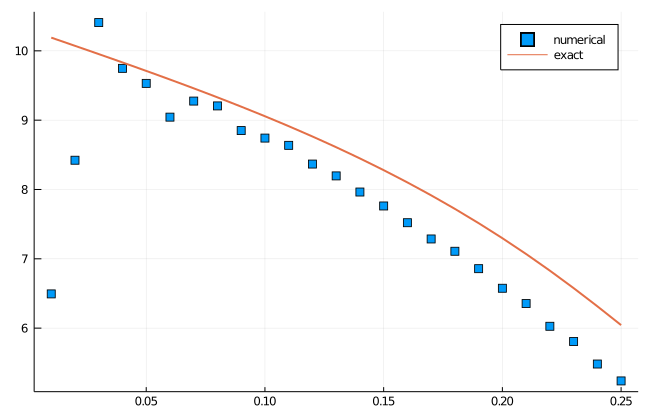

In [19]:
Plots.scatter(rango, num_upwall_data, m=:square, label="numerical", size=(650,420), guidefont=(30,"Courier"))
dibujo=plot!(rango, exact_upwalldata, label="exact", linewidth=2) #absolut PERFECT
savefig("test.pdf")
dibujo


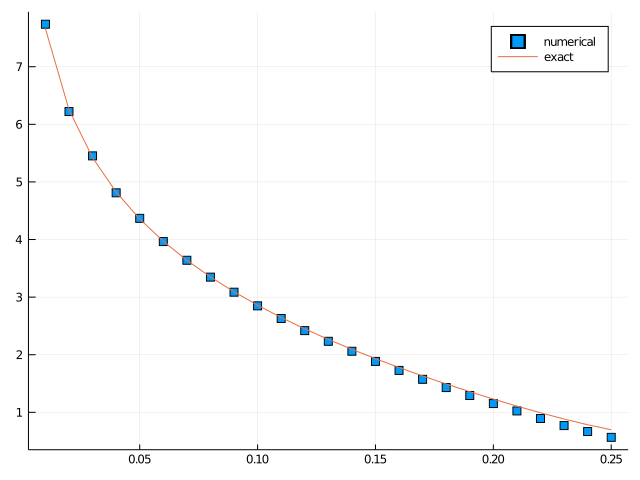

In [20]:
Plots.scatter(rango, log.(num_disc_collision_data), m=:square, label="numerical")
plot!(rango, log.(exact_disc_collision_data), label="exact")


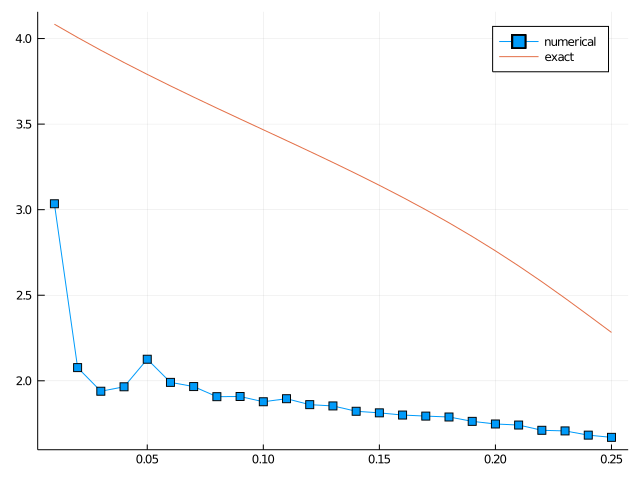

In [21]:
plot(rango, num_horiz_hop_data, m=:square, label="numerical")

plot!(rango, exact_horiz_hop_data, label="exact") 

In [22]:
?diff

search: diff symdiff setdiff symdiff! setdiff! logdiffcdf Cptrdiff_t colordiff



```
diff(A::AbstractVector)
diff(A::AbstractArray; dims::Integer)
```

Finite difference operator on a vector or a multidimensional array `A`. In the latter case the dimension to operate on needs to be specified with the `dims` keyword argument.

!!! compat "Julia 1.1"
    `diff` for arrays with dimension higher than 2 requires at least Julia 1.1.


# Examples

```jldoctest
julia> a = [2 4; 6 16]
2×2 Array{Int64,2}:
 2   4
 6  16

julia> diff(a, dims=2)
2×1 Array{Int64,2}:
  2
 10

julia> diff(vec(a))
3-element Array{Int64,1}:
  4
 -2
 12
```

---

Perform a difference between two HyperRectangles.


# Hitting right wall

Simulation to obtain statistics of collision of disk 1 with the right wall.

In [23]:
function simulationhitwall(w, h, num_collisions=10^5)
    
    num_hitting_times = Float64[]
    exact_hitting_times = Float64[]
    σ=Float64[]
    stderror=Float64[]
    
    rs = 0.0051:0.00256:rmax
    
    for r in rs
        print(r, " ")
        
        a = w/2 - r
        b = h/2 - r
    
        nhits=0
        disc_1_hits_right_wall_times=[]
        while(nhits<200)
            times, positions, velocities, collision_types = dynamics(w, h, r, num_collisions); 
            disc_1_hits_right_wall_times = diff(times[collision_types .== 1])
            nhits=length(disc_1_hits_right_wall_times)
   #         println(r, " ", nhits, "tu abuela", disc_1_hits_right_wall_times[1])
        end
        
        auxhit=mean(disc_1_hits_right_wall_times)
   #     println(auxhit)
        push!(num_hitting_times, auxhit)
        
        push!(exact_hitting_times, right_wall_analytical(a, b, r))
        aux=std(disc_1_hits_right_wall_times)
        push!(σ, aux)
        push!(stderror, aux/sqrt(nhits))
        
        
    end
    
    return rs, num_hitting_times, exact_hitting_times, σ, stderror
end

simulationhitwall (generic function with 2 methods)

In [24]:
nevents=10^6
rs, num_hitting_times, exact_hitting_times, stdeviation, stderror =simulationhitwall(1.5, 1.0, nevents);

0.0051 

MethodError: MethodError: no method matching dynamics(::Float64, ::Float64, ::Float64, ::Int64)
Closest candidates are:
  dynamics(::Any, ::Any, ::Any, ::Any, !Matched::Any) at /home/karel/postdocSanders/TwoDiskinaRectangle/julia_code/discs_in_box3D.jl:75

In [25]:
linea1x=[rhmax, rhmax]
linea1y=[0,7.5]
linea2x=[rvmax,rvmax]
linea2y=linea1y
p=plot(xlim=(0,rmax), ylim=(0,7.5),xlabel="radius",ylabel="time", size=(640,480) )
scatter!(rs, num_hitting_times, m=:square, ms=2, label="numerical", yerror=stderror)
plot!(rs, exact_hitting_times, label="exact", lw=3)
plot!(linea1x,linea1y,label="rhmax", lw=1.0, ls=:dash)
plot!(linea2x, linea2y,label="rvmax", lw=1.0, ls=:dash)
savefig("../articulo/figures/HitRightWall01.pdf")
p

UndefVarError: UndefVarError: rhmax not defined

In [26]:
nevents

1000000

# Disc collisions

In [27]:
function simulation_disc_collisions(w, h, num_collisions=10^5)
    
    num_times = Float64[]
    exact_times = Float64[]
    σ=Float64[]
    stderror=Float64[]
    
    rs = 0.0051:0.005:rmax
    
    for r in rs
        print(r, " ")
        
        a = w/2 - r
        b = h/2 - r
    
        times, positions, velocities, collision_types = dynamics(w, h, r, num_collisions);
        
        collision_times = diff(times[collision_types .== 5])
        nhits=length(collision_times)
        
        push!(num_times, mean(collision_times))   # diff gives inter-hop times
        push!(exact_times, disc_collision_analytical(a, b, r))
        aux=std(num_times)
        push!(σ, aux)
        push!(stderror, aux/sqrt(nhits))
        
        
    end
    
    return rs, num_times, exact_times, σ, stderror
end

simulation_disc_collisions (generic function with 2 methods)

In [28]:
rs, num_disc_collision_times, exact_disc_collision_times, colsig, colerror = simulation_disc_collisions(w, h, nevents);

UndefVarError: UndefVarError: w not defined

In [29]:
linea1y=[0,80]
linea2y=linea1y
p=plot(xlim=(0,rmax), ylim=(0,80),xlabel="radius",ylabel="time", size=(640,480) )
scatter!(rs, num_disc_collision_times, m=:square, ms=2, label="numerical", yerror=colerror)
plot!(rs, exact_disc_collision_times, label="exact", lw=2)
plot!(linea1x,linea1y,label="rhmax", lw=1.0, ls=:dash)
plot!(linea2x, linea2y,label="rvmax", lw=1.0, ls=:dash)
savefig("../articulo/figures/DiscCollitions01.pdf")
p

UndefVarError: UndefVarError: colerror not defined

## Vertical hopping

In [30]:
function simulation_vert_hopping(w, h, num_collisions=10^5)
    
    num_times = Float64[]
    exact_times = Float64[]
    
     σ=Float64[]
    stderror=Float64[]
    
    
    rs = 0.005:0.005:rvmax
    
    for r in rs
        print(r, " ")
    
        a = w/2 - r
        b = h/2 - r
    
        vert_hopping_times=[]
        nhits=0
    
    #    while(nhits<200)
            times, positions, velocities, collision_types = dynamics(w, h, r, num_collisions);
            vert_hopping_times = diff(vertical_hopping_times(times, positions, velocities))
            nhits=length(vert_hopping_times)
#        end
             
        push!(num_times, mean(vert_hopping_times))   # diff gives inter-hop times
        push!(exact_times, vert_hop_analytical(a, b, r))
        
        aux=std(vert_hopping_times)
        push!(σ, aux)
        push!(stderror, aux/sqrt(nhits))
       
    end

    return rs, num_times,exact_times, σ, stderror


end

simulation_vert_hopping (generic function with 2 methods)

In [31]:
rs, num_vert_hopping_times, exact_vert_hopping_times , vhsigma, vhoperror = simulation_vert_hopping(w, h, nevents);

UndefVarError: UndefVarError: w not defined

In [32]:
linea1y=[0,2]
linea2y=linea1y
p=plot(xlim=(0,rvmax), ylim=(0,2),title="Mean Time, Vertical Hop", xlabel="radius",ylabel="time" , size=(640,480))
scatter!(rs, num_vert_hopping_times, m=:square, ms=2, label="numerical", yerror=vhoperror)
plot!(rs, exact_vert_hopping_times, label="exact", lw=2)
plot!(linea1x,linea1y,label="rhmax", lw=1.0, ls=:dash)
plot!(linea2x, linea2y,label="rvmax", lw=1.0, ls=:dash)
savefig("../articulo/figures/VertHop01.pdf")
p

UndefVarError: UndefVarError: rvmax not defined

## Statistics.

Some Plots of interesting statistical propiertes, such as histograms.

In [33]:
using StatsBase

In [34]:
radiosinteresantes=(0.01, 0.075, 0.125, 0.15, 0.2, 0.24)
# radiosinteresantes=(0.01, 0.125, 0.24)

nevents=10^4

thopforhisto=Dict{Float64, Array}()

binlim=10
paso=0.5
rangobins=0:paso:binlim
rangoplot=rangobins[1:end-1].+paso./2

hth=Dict{Float64, Any}()

 w,h=1.5,1
num_collisions=10^7
   

@time for r in radiosinteresantes
    w,h=1.5,1
   # rs, num_vert_hopping_times, exact_vert_hopping_times , vhsigma, vhoperror = simulation_vert_hopping(w, h, nevents);
    times, positions, velocities, collision_types = dynamics(w, h, r, num_collisions);
    thopforhisto[r] = horizontal_hopping_times(times, positions, velocities);
    
    #normalized histograms
    aux=fit(Histogram, diff(thopforhisto[r]), rangobins, closed=:left)
    
    hth[r]=aux.weights./sum(aux.weights)
    
    println(" vamos en el  r=",r)
    
end

MethodError: MethodError: no method matching dynamics(::Float64, ::Int64, ::Float64, ::Int64)
Closest candidates are:
  dynamics(::Any, ::Any, ::Any, ::Any, !Matched::Any) at /home/karel/postdocSanders/TwoDiskinaRectangle/julia_code/discs_in_box3D.jl:75

In [35]:
p=plot(xlim=(0,binlim), xlabel="Time of hop", title="Freq")
for r in radiosinteresantes
    bar!(rangoplot.+r,hth[r], lc=:match, alpha=0.75,bar_width=0.1, label="$r")
end
savefig("histogramahorizontalhopsemidecente01.png")
p

KeyError: KeyError: key 0.01 not found

In [36]:
hth=Dict{Float64, Any}()
r=0.01

0.01

In [37]:
for r in radiosinteresantes
hth[r]=1
end

In [38]:
hth

Dict{Float64,Any} with 6 entries:
  0.15  => 1
  0.01  => 1
  0.2   => 1
  0.075 => 1
  0.24  => 1
  0.125 => 1